   SNo     Name Symbol                 Date        High         Low  \
0    1  Bitcoin    BTC  2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC  2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoin    BTC  2013-05-01 23:59:59  139.889999  107.720001   
3    4  Bitcoin    BTC  2013-05-02 23:59:59  125.599998   92.281898   
4    5  Bitcoin    BTC  2013-05-03 23:59:59  108.127998   79.099998   

         Open       Close  Volume     Marketcap  
0  134.444000  144.539993     0.0  1.603769e+09  
1  144.000000  139.000000     0.0  1.542813e+09  
2  139.000000  116.989998     0.0  1.298955e+09  
3  116.379997  105.209999     0.0  1.168517e+09  
4  106.250000   97.750000     0.0  1.085995e+09  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   S

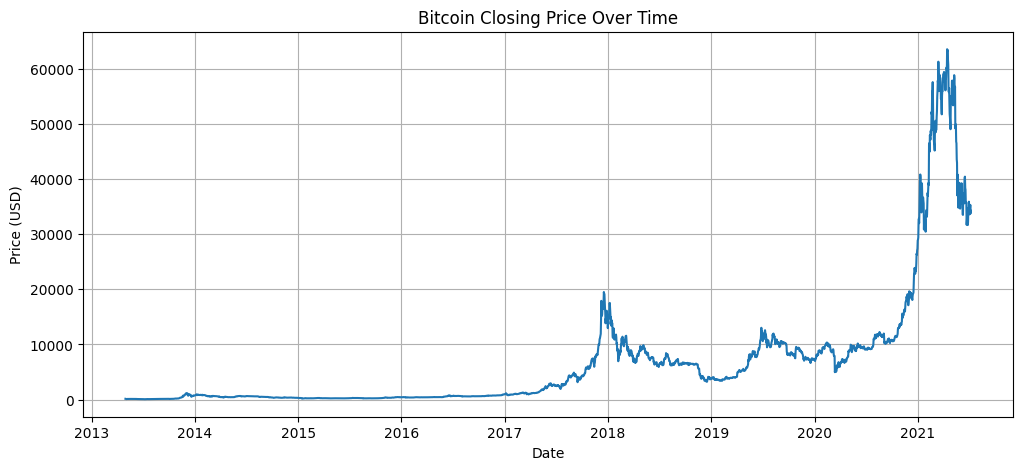

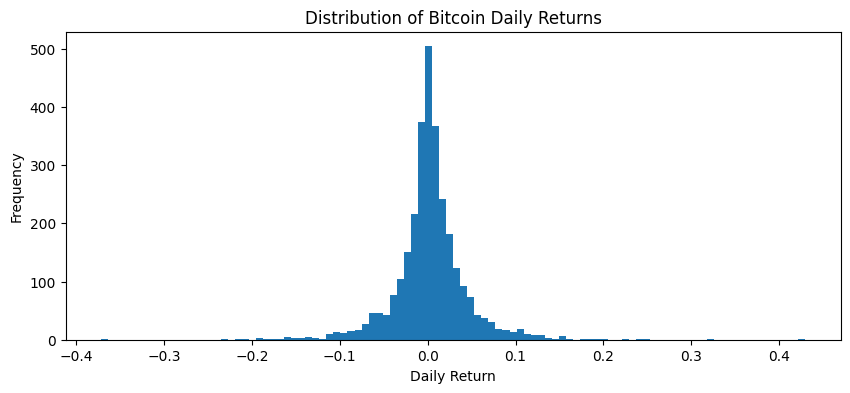

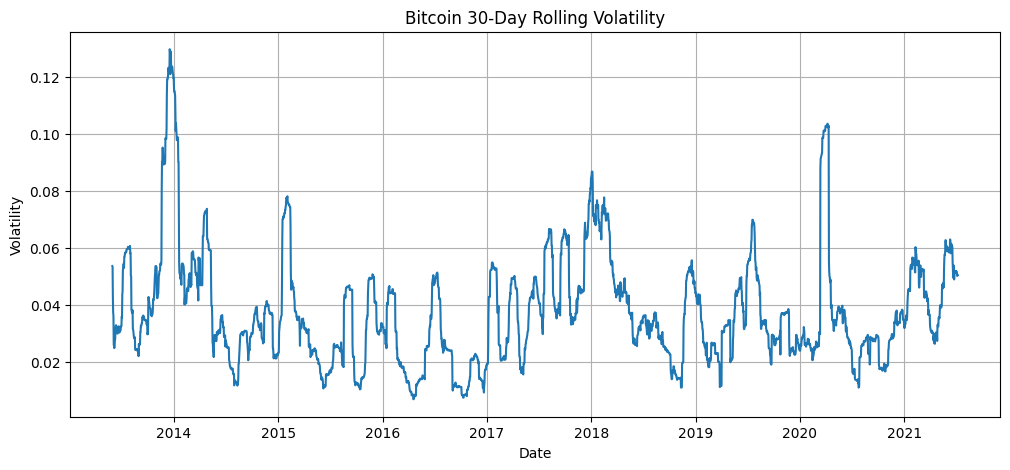

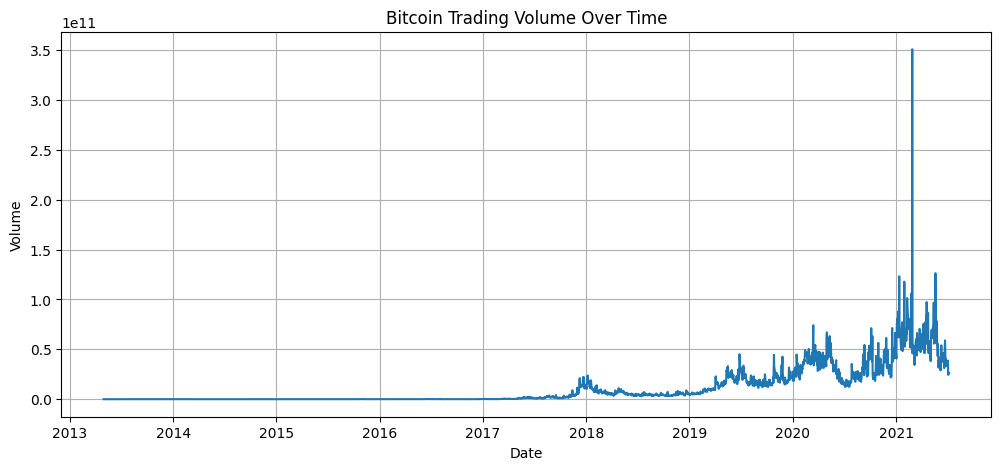

In [2]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Load Bitcoin data
df = pd.read_csv("coin_Bitcoin.csv")

# 3. Basic info
print(df.head())
print(df.info())
print(df.describe())

# 4. Parse dates
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# 5. Handle missing values (drop rows missing price data)
df = df.dropna(subset=['Open', 'High', 'Low', 'Close'])

# 6. Feature engineering: returns & volatility
df['close_lag'] = df['Close'].shift(1)
df['daily_return'] = (df['Close'] - df['close_lag']) / df['close_lag']
df['log_return'] = np.log(df['Close']) - np.log(df['close_lag'])
df['vol_30d'] = df['log_return'].rolling(30).std()

# 7. Plot BTC closing price
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Close'])
plt.title("Bitcoin Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()

# 8. Histogram of daily returns
plt.figure(figsize=(10,4))
plt.hist(df['daily_return'].dropna(), bins=100)
plt.title("Distribution of Bitcoin Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

# 9. Rolling volatility (30-day)
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['vol_30d'])
plt.title("Bitcoin 30-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid(True)
plt.show()

# 10. Volume over time
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Volume'])
plt.title("Bitcoin Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid(True)
plt.show()
